## HW 4 - Ying Yu

### Q1  remove duplicate values in a dataset in Python

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import scipy

In [5]:
df = pd.read_csv('C:/Users/yuc/Desktop/Practice/BA501_python_data.csv')

In [6]:
df.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [12]:
np.unique(df.customer_id)

array(['1', '2', '3'], dtype=object)

### Q2 You are given two tables - friend_request and request_accepted.Friend_request contains requester_id, time and sent_to_id and request_accepted table contains time, acceptor_id and requestor_id. How will you determine the overall acceptance rate of requests?
### Write in both Python and SQL.

In [35]:
# create tables
friend_request = pd.DataFrame(
    {
        'requester_id': ["001","002","003","004","005"],
        'time': ['2/1/2017','2/2/2017','2/3/2017','2/4/2017','2/5/2017'],
        'sent_to_id': ['011','012','012','104','113']        
    },
    columns=['requester_id','time','sent_to_id'])

In [36]:
request_accepted = pd.DataFrame(
    {
        'time': ['2/2/2017','2/4/2017','2/5/2017'],
        'acceptor_id': ['011','012','113'], 
        'requester_id':['001','003','005'] 
        
    },
    columns=['time','acceptor_id','requester_id'])

In [37]:
friend_request.head(5)

,requester_id,time,sent_to_id
0,001,2/1/2017,011
1,002,2/2/2017,012
2,003,2/3/2017,012
3,004,2/4/2017,104
4,005,2/5/2017,113


In [38]:
request_accepted.head(5)

,time,acceptor_id,requester_id
0,2/2/2017,011,001
1,2/4/2017,012,003
2,2/5/2017,113,005


In [ ]:
# Assume there is no duplicate request.

In [39]:
acceptance = pd.merge(friend_request, request_accepted, on = 'requester_id')

In [40]:
acceptance.head(5)

,requester_id,time_x,sent_to_id,time_y,acceptor_id
0,001,2/1/2017,011,2/2/2017,011
1,003,2/3/2017,012,2/4/2017,012
2,005,2/5/2017,113,2/5/2017,113


In [43]:
acceptance_rate = len(acceptance['requester_id']) / len(friend_request['requester_id'])

In [45]:
print(acceptance_rate)

0.6


### Q3 “Issuer” of a credit card are companies like Visa,
Mastercard, American Express. Now we know the
following rules:
CC number starts with: '4'
CC len : 16

Issuer: VISA
CC number starts with: '34', '37'
CC len : 15

Issuer : AMEX
CC number starts with: '36'
CC len : 14

Issuer : Diners Club
Credit card number starts with
'4026', '417500', '4405', '4508', '4844',
'4913', '4917'
CC len : 16
Issuer : VISAELECTRON

### Now write Python scripts to identify the issuer of the
following credit card numbers:
'4175004175004172'  '4917491749174917' '346416800707698' '376416800707698' '37641680070769832112' '36641680070769'
'54545641680070769’

In [184]:
def Judgecard (cc):
    if ((cc[0:2] == '37') and (len(cc) == 15)):
          print ("AMEX")
    if ((cc[0:2] == '34') and (len(cc) == 15)):
          print ("AMEX")
    if (cc[0:2] == '36' and (len(cc) == 14)):
          print ("Dinner Club")
    if (cc[0] == '4' and len(cc) == 16):
        if ((cc[0:4] == '4026' or cc[0:4] == '4405' or cc[0:4] == '4508' or cc[0:4] == '4844' or cc[0:4] == '4913' or cc[0:4] == '4917' or cc[0:6] == '417500')):
              print ("VISAELECTRON")
        else:
              print ("Visa")  

In [185]:
Judgecard('4175004175004172')

VISAELECTRON


In [186]:
Judgecard('4917491749174917')

VISAELECTRON


In [187]:
Judgecard('4917491749174917')

VISAELECTRON


In [188]:
Judgecard('346416800707698')

AMEX


In [189]:
Judgecard('376416800707698')

AMEX


In [190]:
Judgecard('37641680070769832112')

In [191]:
Judgecard('36641680070769')

Dinner Club


In [192]:
Judgecard('54545641680070769')

### Q4: PrintCumulativeTimeSeries()
Input: Three parameters: experiment_id, country, and vertical
Output:
- Time series chart showing the uplift
- Overall % uplift on revenue, experiment vs.control: (red - blue) / blue %    

In [68]:
import datetime

In [69]:
import matplotlib.pyplot as plt

In [70]:
%matplotlib inline

In [129]:
my_data = pd.read_csv('C:/Users/yuc/Desktop/Practice/BA501_python_data.csv')

In [81]:
my_data.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [128]:
# total culumative values
# def GetSeries(my_data, my_id):
#    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
#    series = table.groupby('date')["spend_usd"].sum()
#    for i in range(0,len(blue)):
#        if i == 0:
#            series.iloc[i] = series.iloc[i]
#        else:
#            series.iloc[i] = series.iloc[i-1] + blue.iloc[i]
#    print (series)
#    return(series)    

In [130]:
# group by
def GetSeries(my_data, my_id, my_country, my_verical):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) & (my_data.country == my_country) & (my_data.vertical == my_verical)]
    series = table.groupby('date')["spend_usd"].sum()
    for i in range(0,len(blue)):
        if i == 0:
            series.iloc[i] = series.iloc[i]
        else:
            series.iloc[i] = series.iloc[i-1] + blue.iloc[i]
    print (series)
    return(series)    

In [131]:
# check us customers using ANDROID_APPS
blue = GetSeries(my_data, 12624548, "US", "ANDROID_APPS")
red = GetSeries(my_data, 12624549, "US", "ANDROID_APPS")
index_series = blue.index

date
20170401    1.774648e+04
20170402    3.232300e+05
20170403    1.040737e+06
20170404    2.406458e+06
20170405    4.707969e+06
20170406    8.280259e+06
20170407    1.191463e+07
Name: spend_usd, dtype: float64
date
20170401    1.882695e+04
20170402    3.420570e+05
20170403    1.382794e+06
20170404    3.789253e+06
20170405    8.497221e+06
20170406    1.677748e+07
20170407    2.869211e+07
Name: spend_usd, dtype: float64


In [135]:
def PlotSeries(index_series, experiment_series, control_series):
    df = pd.DataFrame (
    {
        "experiment": experiment_series.tolist(),
        "control": control_series.tolist()
    },
    index = index_series.tolist(),
    columns = ["experiment", "control"]
    )
    fig, ax = plt.subplots()
    ax.plot(df.experiment, color = "red", label = "red")
    ax.plot(df.control, color = "blue", label = "blue")
    
    ax.set_title("Red vs. Blue for US cutomers using ANDROID")
    ax.set_ylabel("Total Spend")
    ax.grid(True, which = "both")
    
    ax.legend().get_texts()[0].set_text("Red")
    ax.legend().get_texts()[1].set_text("Blue")
    
    plt.gcf().autofmt_xdate()

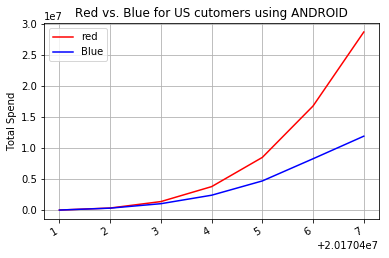

In [136]:
PlotSeries(index_series, red, blue)

In [144]:
# calculate Overall % uplift on revenue, experiment vs.control: (red - blue) / blue % 
overalluplift = (red.iloc[len(red)-1] - blue.iloc[len(blue)-1]) / blue.iloc[len(blue)-1]
print (overalluplift)

1.40814134446
